# Shap Global Local Analysis

## 📊 Model Interpretatsiyasi (SHAP Analysis)

Ushbu loyihada men **Random Forest regressiya modeli** natijalarini tushuntirish va interpretatsiya qilish uchun **SHAP (SHapley Additive exPlanations)** metodidan foydalandim.

SHAP tahlili orqali:
- **Global darajada** model qarorlariga eng katta ta’sir ko‘rsatadigan omillar (feature’lar) aniqlandi;
- **Mahalliy (local) darajada** esa har bir individual bashorat uchun qaysi omillar natijani oshirgan yoki kamaytirganini tushuntirib berildi.

Mazkur yondashuv modelni:
- biznes foydalanuvchilar uchun **shaffof va tushunarli** qiladi,
- qaror qabul qilish jarayonida **ishonchni oshiradi**,
- hamda uni **real production muhitida qo‘llashga yaroqli** holatga keltiradi.


In [4]:
import pandas as pd
import numpy as np

import shap
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

c:\Users\Rasulbek907\Desktop\Food_Demanding_Prediction\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
X = pd.read_csv(
    r"C:\Users\Rasulbek907\Desktop\Food_Demanding_Prediction\Data\feature_selection\selected_features.csv"
)

y = pd.read_csv(
    r"C:\Users\Rasulbek907\Desktop\Food_Demanding_Prediction\Data\feature_selection\target_num_orders.csv"
).squeeze()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
rf = RandomForestRegressor(
    random_state=42,
    n_estimators=200,
    n_jobs=-1
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
explainer = shap.TreeExplainer(rf)

In [9]:
X_shap = X_test.sample(n=2000, random_state=42)

shap_values = explainer.shap_values(X_shap)


# GLOBAL SHAP ANALYSIS

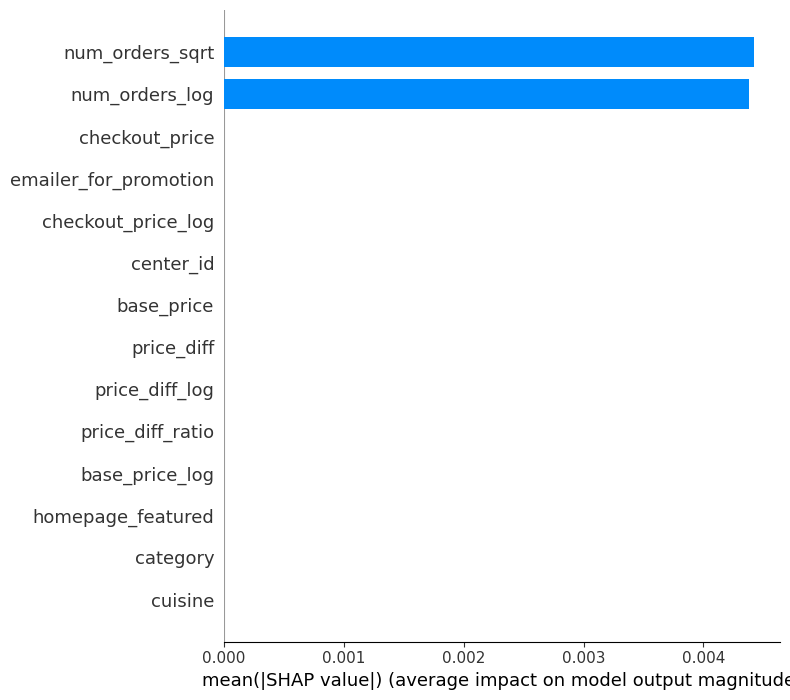

In [10]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="bar",
    show=True
)

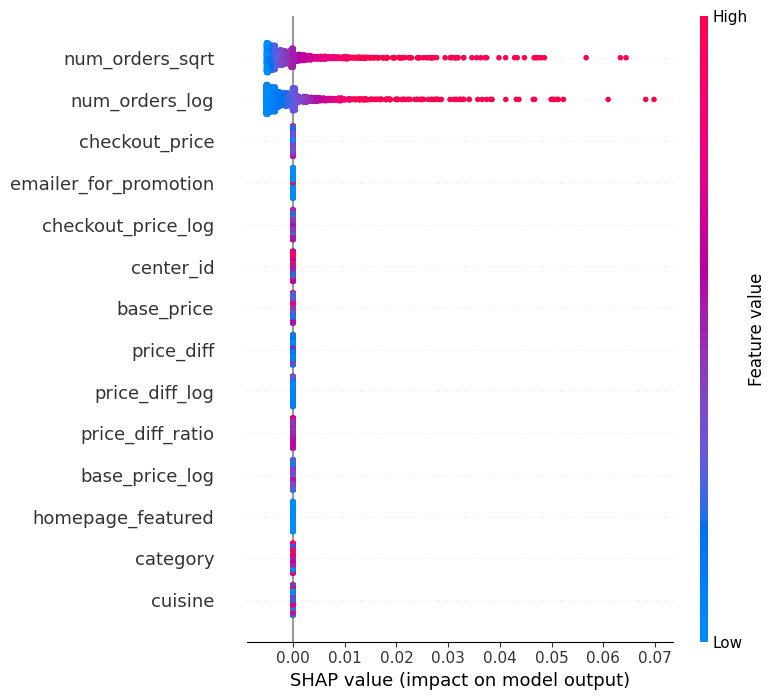

In [11]:
shap.summary_plot(
    shap_values,
    X_shap,
    show=True
)


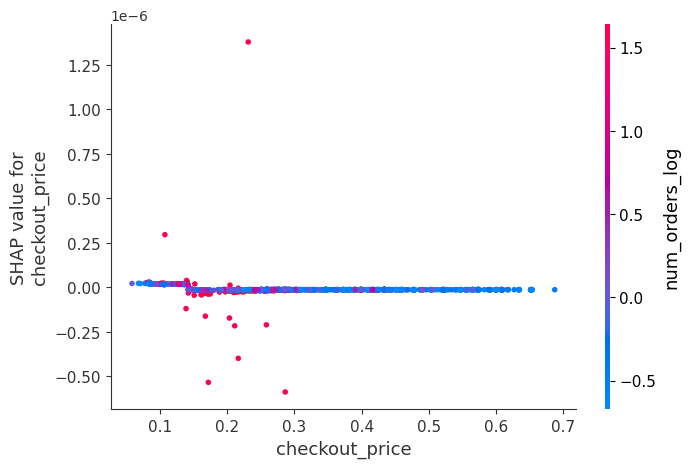

In [12]:
shap.dependence_plot(
    "checkout_price",
    shap_values,
    X_shap
)


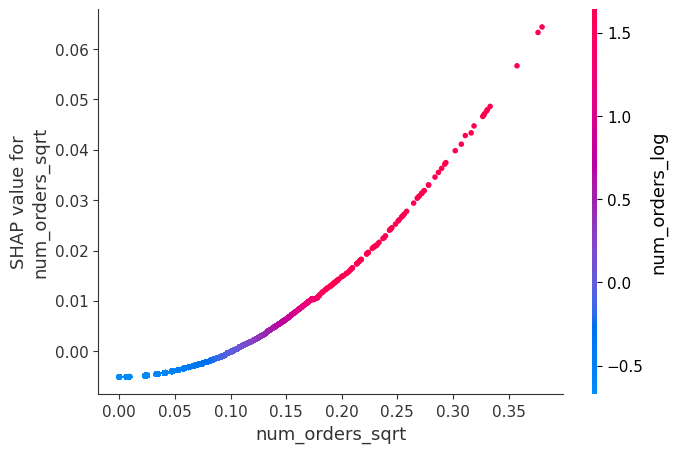

In [13]:
top_feature = X_shap.columns[
    np.abs(shap_values).mean(axis=0).argmax()
]

shap.dependence_plot(
    top_feature,
    shap_values,
    X_shap
)


# LOCAL SHAP ANALYSIS

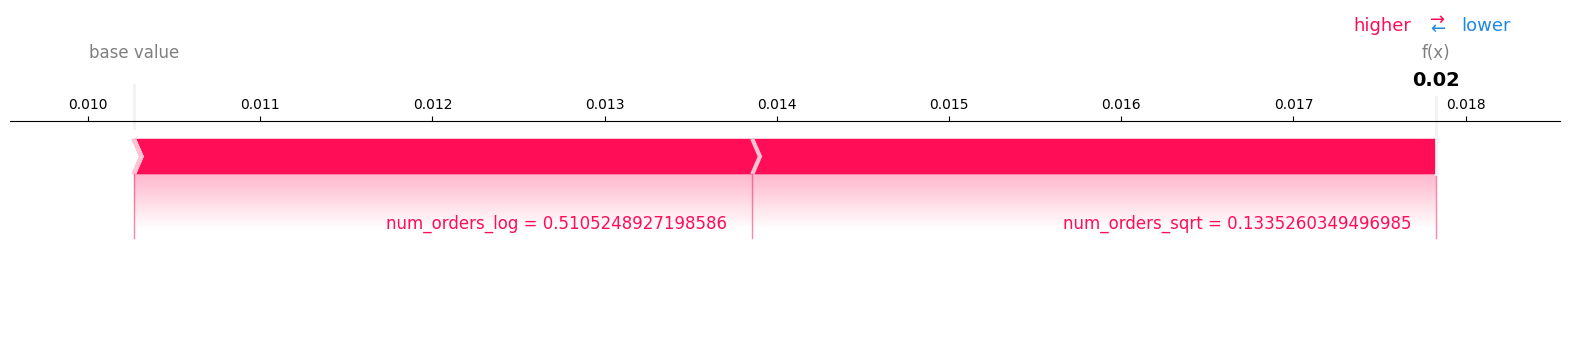

In [14]:
# Bitta test sample
idx = 0
x_instance = X_test.iloc[idx]

shap_value_single = explainer.shap_values(x_instance)

shap.force_plot(
    explainer.expected_value,
    shap_value_single,
    x_instance,
    matplotlib=True
)

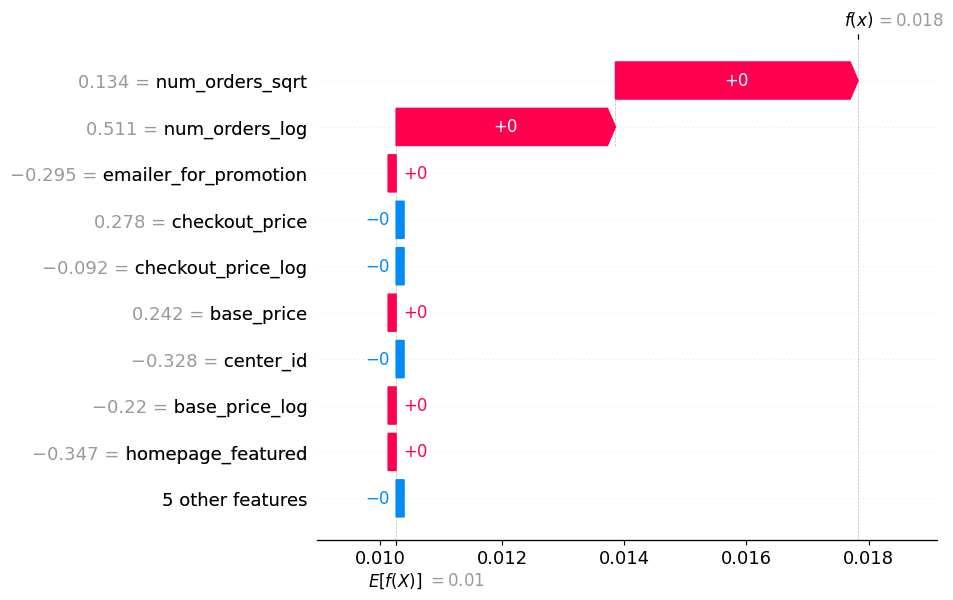

In [15]:
shap.plots.waterfall(
    shap.Explanation(
        values=shap_value_single,
        base_values=explainer.expected_value,
        data=x_instance,
        feature_names=X.columns
    )
)


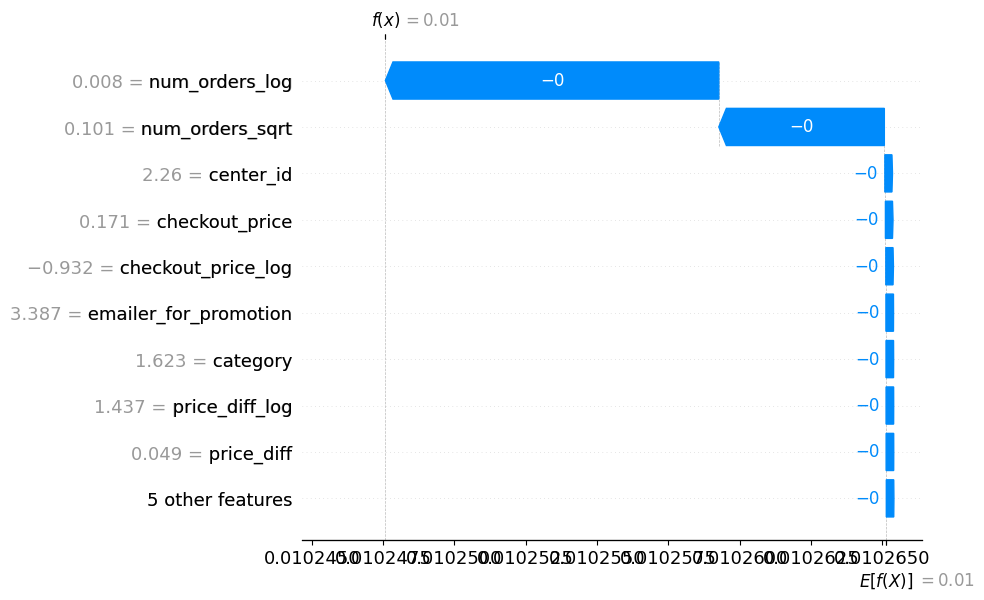

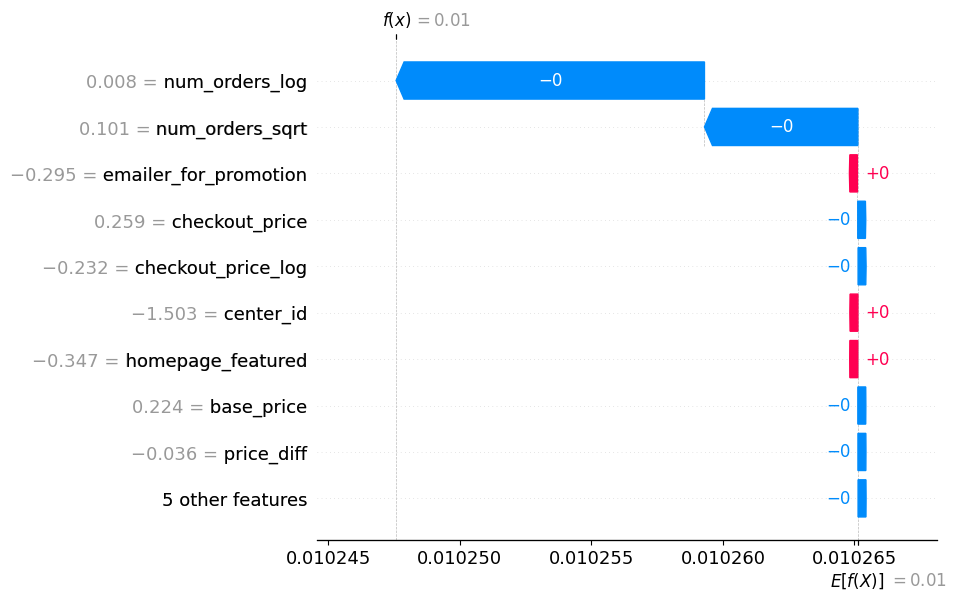

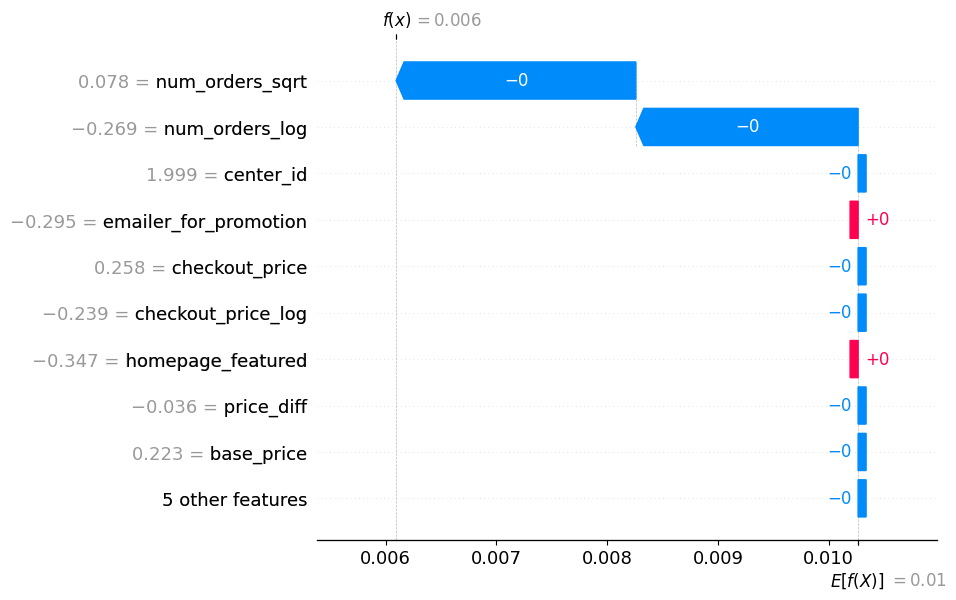

In [16]:
# Bir nechta observation uchun
for i in range(3):
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values[i],
            base_values=explainer.expected_value,
            data=X_shap.iloc[i],
            feature_names=X.columns
        )
    )


In [17]:
# RF built-in importance
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# SHAP importance
shap_importance = pd.Series(
    np.abs(shap_values).mean(axis=0),
    index=X_shap.columns
).sort_values(ascending=False)

comparison = pd.DataFrame({
    "RF_Importance": rf_importance,
    "SHAP_Importance": shap_importance
})

comparison.head(10)


,RF_Importance,SHAP_Importance
base_price,3.679763e-06,9.697711e-09
base_price_log,3.436177e-06,5.388409e-09
category,1.401859e-06,3.922850e-09
center_id,5.134886e-06,1.554533e-08
checkout_price,7.976290e-06,1.679979e-08
checkout_price_log,6.259721e-06,1.590148e-08
cuisine,1.394168e-06,2.303813e-09
emailer_for_promotion,2.276551e-06,1.614127e-08
homepage_featured,6.923474e-07,5.362274e-09
num_orders_log,5.096257e-01,4.378762e-03
